### Main file

In [1]:
import numpy as np 
from tools.srbm import *
from tools.helpers import *
#from brian2 import *
#from brian2tools import *
import matplotlib.pyplot as plt
#import datetime
#from tools.parameters_main import *     # this needs to be loaded last

date_str = str(datetime.datetime.now())[0:10]
date_time_str = str(datetime.datetime.now())[0:10]+"_"+str(datetime.datetime.now())[11:16]

In [2]:
Id = create_Id(N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, beta = beta_parameter, n_samples=n_samples)
W, b_v, b_c, b_h = create_rbm_parameters(N_v = N_v, N_c = N_c, N_h = N_h)
mnist_data = load_mnist_data(n_samples = n_samples, min_p = .00001, max_p = .98, binary = True, seed=0)

In [3]:

loc = main(W, b_v, b_c, b_h, Id = Id, dorun = True, monitors = True, mnist_data=mnist_data) # changed from create_Id to Id

Creating equation
Creating Population


WARNING    Removing unsupported flag '-march=native' from compiler flags. [brian2.codegen.cpp_prefs]
INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.01s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.01s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]


Train accuracy: 0.06
Test accuracy: 0.08
Train accuracy: 0.145
Test accuracy: 0.098
Train accuracy: 0.08
Test accuracy: 0.081
Train accuracy: 0.09
Test accuracy: 0.104
Train accuracy: 0.14
Test accuracy: 0.113
Train accuracy: 0.1
Test accuracy: 0.109
Train accuracy: 0.16
Test accuracy: 0.102
Train accuracy: 0.165
Test accuracy: 0.1
Train accuracy: 0.225
Test accuracy: 0.165
Train accuracy: 0.2
Test accuracy: 0.152
Train accuracy: 0.09
Test accuracy: 0.1
Train accuracy: 0.09
Test accuracy: 0.098
Train accuracy: 0.155
Test accuracy: 0.162
Train accuracy: 0.185
Test accuracy: 0.171
Train accuracy: 0.22
Test accuracy: 0.141
Train accuracy: 0.235
Test accuracy: 0.202
Train accuracy: 0.19
Test accuracy: 0.188
Train accuracy: 0.25
Test accuracy: 0.242
Train accuracy: 0.27
Test accuracy: 0.234
Train accuracy: 0.19
Test accuracy: 0.191
Train accuracy: 0.17
Test accuracy: 0.179
Train accuracy: 0.17
Test accuracy: 0.174
Train accuracy: 0.21
Test accuracy: 0.218
Train accuracy: 0.255
Test accuracy

In [4]:
locals().update(loc)

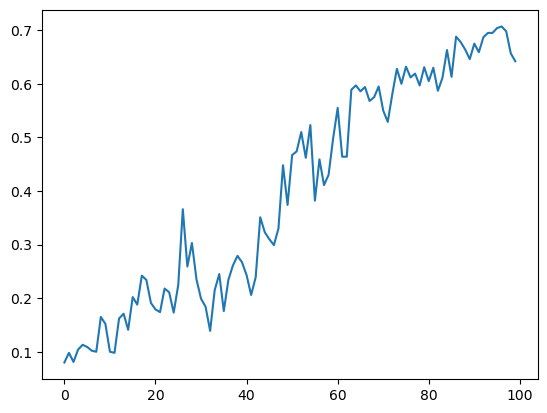

In [5]:
plot(res_hist_test)
plt.show()

In [9]:
# Why does beta get replaced by the numpy function??
W = np.array(Srs.w).reshape(N_v+N_c, N_h)*beta_parameter
Wvh=W[:N_v,:]
Wch=W[N_v:,:]
mBv = np.array(Sbv.w)*beta_parameter*tau_rec*bias_input_rate
mBh = np.array(Sbh.w)*beta_parameter*tau_rec*bias_input_rate
b_c = mBv[N_v:(N_v+N_c)]
b_v = mBv[:N_v]
b_h = mBh
mB = np.concatenate([mBv,mBh])

In [10]:
save_matrices(W, Wvh, Wch, mBv, mBh, b_c, b_v, b_h, mB, date_str, date_time_str)

Matrices saved to output/output/2023-04-17/00-34
